In [155]:
#for linear algebra and data processing 
import numpy as np 
import pandas as pd 

In [156]:
#for graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [157]:
df = pd.read_csv('datasets_1095_1978_Loan payments data.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


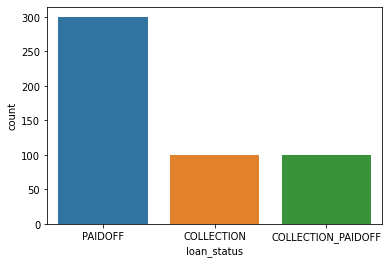

In [159]:
sns.countplot(x='loan_status',data=df)

In [160]:
df['paid_off_time'].isnull().value_counts()

False    400
True     100
Name: paid_off_time, dtype: int64

In [161]:
df['past_due_days'].isnull().value_counts()

True     300
False    200
Name: past_due_days, dtype: int64

In [162]:
df = df.drop('paid_off_time',axis=1)

In [163]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'past_due_days', 'age', 'education', 'Gender'],
      dtype='object')

In [164]:
df['past_due_days'].fillna(value=0,inplace=True)

In [165]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,0.0,28,college,female


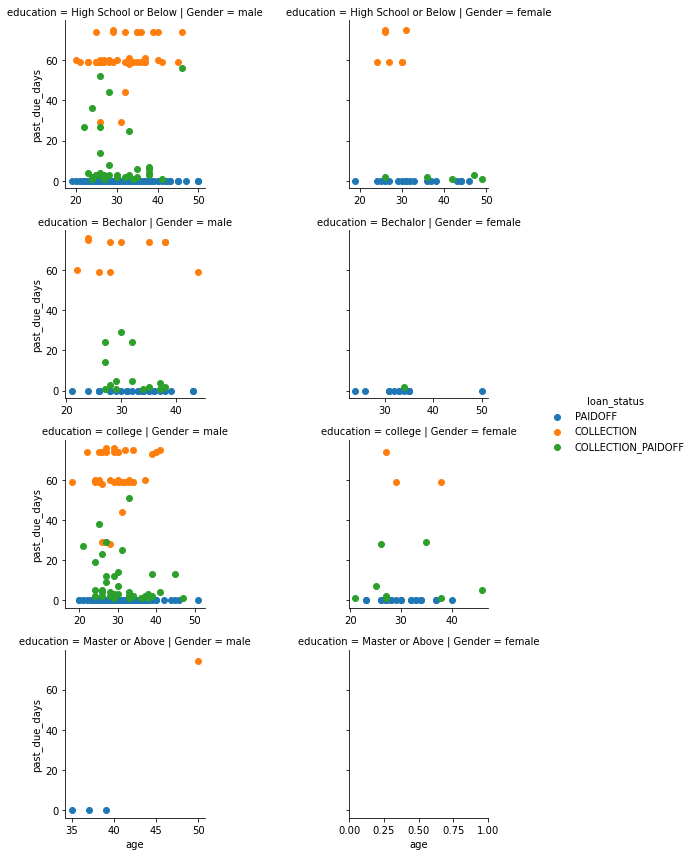

In [166]:
g = sns.FacetGrid(data=df, col='Gender', row='education', hue='loan_status', sharex=False)
g = g.map(plt.scatter, 'age', 'past_due_days').add_legend(bbox_to_anchor=(1.2,0.5))
plt.tight_layout()

In [167]:
df.groupby('loan_status')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
COLLECTION,100.0,30.61,6.023347,18.0,26.0,30.0,34.0,50.0
COLLECTION_PAIDOFF,100.0,31.34,6.312118,21.0,26.0,30.0,35.0,49.0
PAIDOFF,300.0,31.21,6.039383,19.0,27.0,30.0,35.0,51.0


In [168]:
df.groupby('loan_status')['education'].describe()

,count,unique,top,freq
loan_status,,,,
COLLECTION,100,4,High School or Below,49
COLLECTION_PAIDOFF,100,3,college,48
PAIDOFF,300,4,college,133


In [169]:
df.groupby('loan_status')['Gender'].describe()

,count,unique,top,freq
loan_status,,,,
COLLECTION,100,2,male,90
COLLECTION_PAIDOFF,100,2,male,86
PAIDOFF,300,2,male,247


In [170]:
dummies = pd.get_dummies(df['Gender'], drop_first=True)
df = df.drop('Gender', axis=1)
df = pd.concat([df,dummies], axis=1)

In [171]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,male
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,45,High School or Below,1
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,50,Bechalor,0
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,33,Bechalor,0
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,0.0,27,college,1
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,0.0,28,college,0


In [172]:
df['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [173]:
dummies_edu = pd.get_dummies(df['education'], drop_first=True)
df = df.drop('education', axis=1)
pd.concat([df, dummies_edu], axis=1)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,male,High School or Below,Master or Above,college
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,45,1,1,0,0
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,50,0,0,0,0
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,0.0,33,0,0,0,0
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,0.0,27,1,0,0,1
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,0.0,28,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,3.0,28,1,1,0,0
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,14.0,26,1,1,0,0
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,3.0,30,1,0,0,1
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,1.0,38,0,0,0,1


In [174]:
df['effective_date_month'] = pd.DatetimeIndex(df['effective_date']).month
df['effective_date_year'] = pd.DatetimeIndex(df['effective_date']).year
df['due_date_month'] = pd.DatetimeIndex(df['due_date']).month
df['due_date_year'] = pd.DatetimeIndex(df['due_date']).year
df = df.drop(['effective_date', 'due_date'], axis=1)

In [175]:
df.head()

,Loan_ID,loan_status,Principal,terms,past_due_days,age,male,effective_date_month,effective_date_year,due_date_month,due_date_year
0,xqd20166231,PAIDOFF,1000,30,0.0,45,1,9,2016,10,2016
1,xqd20168902,PAIDOFF,1000,30,0.0,50,0,9,2016,10,2016
2,xqd20160003,PAIDOFF,1000,30,0.0,33,0,9,2016,10,2016
3,xqd20160004,PAIDOFF,1000,15,0.0,27,1,9,2016,9,2016
4,xqd20160005,PAIDOFF,1000,30,0.0,28,0,9,2016,10,2016


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               500 non-null    object 
 1   loan_status           500 non-null    object 
 2   Principal             500 non-null    int64  
 3   terms                 500 non-null    int64  
 4   past_due_days         500 non-null    float64
 5   age                   500 non-null    int64  
 6   male                  500 non-null    uint8  
 7   effective_date_month  500 non-null    int64  
 8   effective_date_year   500 non-null    int64  
 9   due_date_month        500 non-null    int64  
 10  due_date_year         500 non-null    int64  
dtypes: float64(1), int64(7), object(2), uint8(1)
memory usage: 39.7+ KB


In [177]:
df['effective_date_month'].unique()

array([9], dtype=int64)

In [178]:
df['effective_date_year'].unique()

array([2016], dtype=int64)

In [179]:
df['due_date_month'].unique()

array([10,  9, 11], dtype=int64)

In [180]:
df['due_date_year'].unique()

array([2016], dtype=int64)

In [181]:
df = df.drop(['effective_date_month', 'effective_date_year', 'due_date_month', 'due_date_year'], axis=1)
df.head()

,Loan_ID,loan_status,Principal,terms,past_due_days,age,male
0,xqd20166231,PAIDOFF,1000,30,0.0,45,1
1,xqd20168902,PAIDOFF,1000,30,0.0,50,0
2,xqd20160003,PAIDOFF,1000,30,0.0,33,0
3,xqd20160004,PAIDOFF,1000,15,0.0,27,1
4,xqd20160005,PAIDOFF,1000,30,0.0,28,0


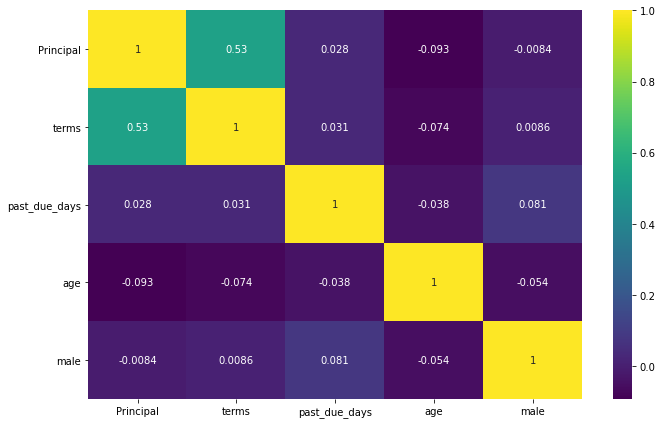

In [182]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.tight_layout()

In [183]:
df = df.drop('Loan_ID', axis=1)
df.head()

,loan_status,Principal,terms,past_due_days,age,male
0,PAIDOFF,1000,30,0.0,45,1
1,PAIDOFF,1000,30,0.0,50,0
2,PAIDOFF,1000,30,0.0,33,0
3,PAIDOFF,1000,15,0.0,27,1
4,PAIDOFF,1000,30,0.0,28,0


In [184]:
from sklearn.model_selection import train_test_split

In [186]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
scaler = MinMaxScaler()

In [190]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
prediction = logmodel.predict(X_test)

In [196]:
from sklearn.metrics import classification_report, confusion_matrix

In [195]:
print(classification_report(y_test, prediction))

                    precision    recall  f1-score   support

        COLLECTION       0.96      0.89      0.92        27
COLLECTION_PAIDOFF       0.40      0.07      0.12        29
           PAIDOFF       0.81      1.00      0.89       109

          accuracy                           0.82       165
         macro avg       0.72      0.65      0.64       165
      weighted avg       0.76      0.82      0.76       165



In [197]:
print(confusion_matrix(y_test, prediction))

[[ 24   3   0]
 [  1   2  26]
 [  0   0 109]]
